In [1]:
from IPython.display import Image
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
from skimage.transform import resize
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
%matplotlib inline

Using TensorFlow backend.


In [2]:
DATA_LOCATION = '../data/'
TRAIN_IMAGES_LOCATION = '../data/train_images/'
IMAGE_SIZE = 64

In [3]:
train_labels = pd.read_csv(DATA_LOCATION + 'train_onelabel.csv')
train_labels = train_labels.rename(columns={'image': 'filepath'})
#train_labels = train_labels.sample(n=2000)

In [4]:
def get_image(row):
    """
    Load image from filepath to a numpy.ndarray
    input:
        - filepath: string with relative or absolute path to image
    output:
        - img:
            numpy.ndarray containing the image
            shaped (M,N), values [0.0, 1.0]
    """
    try:
        img = TRAIN_IMAGES_LOCATION + row['filepath']
        img = mpimg.imread(img)
    except:
        img = row
        img = mpimg.imread(img)
    img = np.absolute(np.divide(img.astype(float), 255) - 1.0)
    return img

def get_padding(i):
    """
    Helper function for getting right padding sizes
    input:
        - i: positive integer gotten from substracting height and width of an image
    output:
        - Tuple representing the correct padding
    """
    if i%2 == 0:
        return (int(i/2),int(i/2))
    else:
        return (int(i/2-.5), int(i/2+.5))
    
def pad_image(img):
    """
    Add padding to image to make it square
    input:
        - img: numpy array (2D) representing image
    output:
        - padded array of shape (N,N)
    """
    H, W = img.shape
    if H == W:
        return img
    elif H > W:
        return np.pad(img, ((0,0), get_padding(H-W)), 'constant')
    else:
        return np.pad(img, (get_padding(W-H), (0,0)), 'constant')
    
def resize_image(img, size):
    """
    Resize image to new square shape
    input:
        - img: numpy array (2D) representing image
        - size: final shape of image in pixels (integer)
    """
    return resize(img, (size,size), mode='reflect')

def flattened_image(row):
    """
    Loads and processes image to be used later on
    input:
        - row: Pandas.DataFrame row
    output:
        - Python list, flattened np.ndarray
    """
    img = get_image(row)
    img = pad_image(img)
    img = resize_image(img, IMAGE_SIZE)
    return img.flatten().tolist()

def get_shape(row):
    """
    Loads and processes image to be used later on
    input:
        - row: Pandas.DataFrame row
    output:
        - tuple, with original image dimensions
    """
    img = get_image(row)
    return img.shape

In [5]:
# get image from file
# pad the image to a sqaure
# resize to IMAGE_SIZE
# flatten and convert np.array to Python list
train_labels['image'] = train_labels.apply(flattened_image, axis=1)

In [6]:
train_labels.sample(n=10)

,filepath,class,image
13017,102591.jpg,58,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3668,133590.jpg,12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
17553,81551.jpg,84,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2425,50201.jpg,8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9925,55875.jpg,45,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
15987,13444.jpg,76,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7034,65955.jpg,31,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6693,153090.jpg,28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
16539,84596.jpg,81,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
15774,33396.jpg,74,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


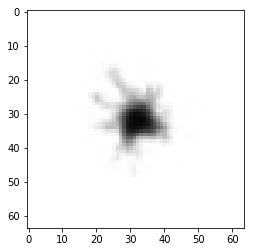

In [7]:
example = train_labels.sample(n=1).iloc[0]['image']
plt.imshow(np.asarray(example).reshape(IMAGE_SIZE,IMAGE_SIZE),cmap='binary')

In [8]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels['class'])
# Find the unique numbers from the train labels
classes = np.unique(train_labels['class'])
nClasses = len(classes)

In [21]:
train_data = train_labels['image'].values

In [22]:
for i in range(len(train_data)):
    train_data[i] = np.asarray(train_data[i])

print('{}, {}'.format(train_data.shape, train_data[0].shape))
train_data = np.array(train_data.tolist())
print('{}'.format(train_data.shape))

(24204,), (64, 64)
(24204, 64, 64)


In [12]:
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(IMAGE_SIZE**2,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1)

Epoch 1/20
24204/24204 [==============================] - 16s - loss: 3.5255 - acc: 0.2141    
Epoch 2/20
24204/24204 [==============================] - 17s - loss: 2.8258 - acc: 0.3230    
Epoch 3/20
24204/24204 [==============================] - 14s - loss: 2.5143 - acc: 0.3714    
Epoch 4/20
24204/24204 [==============================] - 14s - loss: 2.2936 - acc: 0.4078    
Epoch 5/20
24204/24204 [==============================] - 14s - loss: 2.1443 - acc: 0.4307    
Epoch 6/20
24204/24204 [==============================] - 14s - loss: 2.0371 - acc: 0.4556    
Epoch 7/20
24204/24204 [==============================] - 17s - loss: 1.9290 - acc: 0.4776    
Epoch 8/20
24204/24204 [==============================] - 14s - loss: 1.8414 - acc: 0.4984    
Epoch 9/20
24204/24204 [==============================] - 13s - loss: 1.7783 - acc: 0.5065    
Epoch 10/20
24204/24204 [==============================] - 13s - loss: 1.7101 - acc: 0.5213    
Epoch 11/20
24204/24204 [========================

In [13]:
model_reg.save('../data/output/models/model1.h5')

In [23]:
#train_data = train_labels['image'].values
#for i in range(len(train_data)):
#    train_data[i] = np.asarray(train_data[i]).reshape(IMAGE_SIZE,IMAGE_SIZE)
#
#print('{}'.format(train_data.shape))
train_data = np.reshape(train_data, (-1,64,64,1))
print('{}'.format(train_data.shape))

(24204, 64, 64, 1)


In [24]:
model_a = Sequential()
model_a.add(Conv2D(32, (3, 3), input_shape=(IMAGE_SIZE,IMAGE_SIZE,1), padding='same', activation='relu'))
model_a.add(Dropout(0.5))
model_a.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))
model_a.add(Flatten())
model_a.add(Dense(512, activation='relu'))
model_a.add(Dropout(0.5))
model_a.add(Dense(nClasses, activation='softmax'))

model_a.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history_a = model_a.fit(train_data, train_labels_one_hot, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
24204/24204 [==============================] - 640s - loss: 3.0315 - acc: 0.2946   
Epoch 2/20
24204/24204 [==============================] - 633s - loss: 2.2192 - acc: 0.4310   
Epoch 3/20
24204/24204 [==============================] - 578s - loss: 1.9056 - acc: 0.4887   
Epoch 4/20
24204/24204 [==============================] - 532s - loss: 1.6646 - acc: 0.5439   
Epoch 5/20
24204/24204 [==============================] - 558s - loss: 1.4866 - acc: 0.5918   
Epoch 6/20
24204/24204 [==============================] - 517s - loss: 1.3234 - acc: 0.6272   
Epoch 7/20
24204/24204 [==============================] - 522s - loss: 1.1788 - acc: 0.6650   
Epoch 8/20
24204/24204 [==============================] - 541s - loss: 1.0465 - acc: 0.7003   
Epoch 9/20
24204/24204 [==============================] - 530s - loss: 0.9348 - acc: 0.7289   
Epoch 10/20
24204/24204 [==============================] - 559s - loss: 0.8507 - acc: 0.7502   
Epoch 11/20
24204/24204 [========================

In [27]:
model_a.save('../data/output/models/model2.h5')

In [28]:
model_a.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
dropout_5 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
__________